In [3]:
from google.colab import files
uploaded = files.upload()

Saving astute-charter-213919-5ec1a3605d75.json to astute-charter-213919-5ec1a3605d75.json


In [4]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "astute-charter-213919-5ec1a3605d75.json"

In [ ]:
from google.cloud import bigquery
client = bigquery.Client()

query = """ SELECT receipt_contract_address, COUNT(*) AS contract_deployments
FROM bigquery-public-data.crypto_ethereum.transactions
WHERE receipt_contract_address IS NOT NULL
GROUP BY receipt_contract_address
ORDER BY contract_deployments DESC LIMIT 10 """

df = client.query(query).to_dataframe()
df.head()

,receipt_contract_address,contract_deployments
0,0x824f9851585a0a44646ede85a8421f64c8185a49,1
1,0xd7a7776add9f09eb2ceaa99f3b3e97f423c19c91,1
2,0xf7cb463f71e76f31568b3ff90b2d9b047fb05398,1
3,0xa758fac9993f0e226ee0e2a1b374fd1d912cb44a,1
4,0xad327b1a67fa4ffa6b06f7a1204d7c01f233ae4e,1


In [ ]:
from google.cloud import bigquery
client = bigquery.Client()

query = """ SELECT AVG(confirmation_time_sec) AS avg_block_confirmation_time_sec
FROM (
  SELECT number, timestamp, LAG(timestamp) OVER (ORDER BY number) AS prev_timestamp,
   TIMESTAMP_DIFF(timestamp, LAG(timestamp) OVER (ORDER BY number), SECOND) AS confirmation_time_sec
   FROM bigquery-public-data.crypto_ethereum.blocks )
   WHERE confirmation_time_sec IS NOT NULL """

df = client.query(query).to_dataframe()
df.head()

,avg_block_confirmation_time_sec
0,78.777093


In [ ]:
from google.cloud import bigquery
client = bigquery.Client()

query = """ SELECT *
FROM bigquery-public-data.crypto_ethereum.transactions
LIMIT 10 """

df = client.query(query).to_dataframe()
df.head()

,hash,nonce,transaction_index,from_address,to_address,value,gas,gas_price,input,receipt_cumulative_gas_used,...,block_number,block_hash,max_fee_per_gas,max_priority_fee_per_gas,transaction_type,receipt_effective_gas_price,max_fee_per_blob_gas,blob_versioned_hashes,receipt_blob_gas_price,receipt_blob_gas_used
0,0x561ea0de300af7700ff4b013ddefb4310fdc666d8d09...,544,105,0xb981290d9d804075986482f0302c03a3cd2aff32,0x0000000000c2d145a2526bd8c716263bfebe1a72,0E-9,656095,590931723,0x32389b71000000000000000000000000000000000000...,5023284,...,22124606,0x688f610a3f0d1ccfe31b32379fc124bff244f5739874...,1100000000,79000000,2,590931723,<NA>,[],<NA>,<NA>
1,0x71af03fea0537d46ac6c6dacf91001c1c13d2ecb76f7...,29,32,0x2d3608218deec0802ced63806702e413cf81eeff,0xa9ac43f5b5e38155a288d1a01d2cbc4478e14573,27731717275400000000.000000000,21000,1111931723,0x,1491973,...,22124606,0x688f610a3f0d1ccfe31b32379fc124bff244f5739874...,6100000000,600000000,2,1111931723,<NA>,[],<NA>,<NA>
2,0x98b68854766094142d1030066aeebcb24bd3969bf508...,4146947,324,0x974caa59e49682cda0ad2bbe82983419a2ecc400,0xdac17f958d2ee523a2206206994597c13d831ec7,0E-9,1050000,520895452,0xa9059cbb000000000000000000000000f6a10c67f8d9...,14426387,...,22124607,0x7d9475ab4f1842cbf963b793e88a9c8bdbd55306fbc7...,<NA>,<NA>,0,520895452,<NA>,[],<NA>,<NA>
3,0x2f28eb57ddfc969e7c0dc8960d5a8b40b6c04a019bba...,11084704,27,0xdfd5293d8e347dfe59e90efd55b2956a1343963d,0x3073f7aaa4db83f95e9fff17424f71d4751a3073,0E-9,207128,2470346461,0xa9059cbb0000000000000000000000002b1af8a3f4bf...,1254317,...,22124607,0x7d9475ab4f1842cbf963b793e88a9c8bdbd55306fbc7...,102000000000,2000000000,2,2470346461,<NA>,[],<NA>,<NA>
4,0xb2863baacae1bc1b97c4cf833da5c1d5e7c5fb44446d...,37017,74,0x147ac0b39675769e55a0f0e7fdd3641b47963661,0xdac17f958d2ee523a2206206994597c13d831ec7,0E-9,90000,1473206992,0xa9059cbb000000000000000000000000fff69fc9da73...,8222101,...,22124612,0x87bd4c51477ca18db52746a1992d304b6bf1f89a9055...,3026166402,1000000000,2,1473206992,<NA>,[],<NA>,<NA>


In [ ]:
from google.cloud import bigquery
client = bigquery.Client()

query = """ SELECT
  DATE(block_timestamp) AS transaction_date,
  AVG(gas_price) / 1e9 AS avg_gas_price_gwei
FROM `bigquery-public-data.crypto_ethereum.transactions`
GROUP BY transaction_date
ORDER BY transaction_date DESC
LIMIT 3 """

df = client.query(query).to_dataframe()
df.head()

,transaction_date,avg_gas_price_gwei
0,2025-03-25,1.839871
1,2025-03-24,2.091352
2,2025-03-23,1.641668


In [ ]:
from google.cloud import bigquery
client = bigquery.Client()

query = """ SELECT
from_address,
to_address,
value / 1e18 AS eth_value,
block_number
FROM bigquery-public-data.crypto_ethereum.transactions
WHERE LOWER(to_address) IN (
'0x2c4bd064b998838076fa341a83d007fc2fa50957',
'0x5d22045daceab03b158031ecb7d9d06fad24609b'
)
ORDER BY block_number DESC
LIMIT 100 """

df = client.query(query).to_dataframe()
df.head()

,from_address,to_address,eth_value,block_number
0,0x5acaf86db8c7e24da9ef91a73707dfe5f076091a,0x5d22045daceab03b158031ecb7d9d06fad24609b,0E-9,22016001
1,0xc451b0191351ce308fdfd779d73814c910fc5ecb,0x5d22045daceab03b158031ecb7d9d06fad24609b,0E-9,22015956
2,0x5acaf86db8c7e24da9ef91a73707dfe5f076091a,0x5d22045daceab03b158031ecb7d9d06fad24609b,0E-9,21981539
3,0x8a6c80aab6497e2db35817817b593b79d78f6ae5,0x5d22045daceab03b158031ecb7d9d06fad24609b,0E-9,21977563
4,0x8a6c80aab6497e2db35817817b593b79d78f6ae5,0x5d22045daceab03b158031ecb7d9d06fad24609b,0E-9,21967625


In [ ]:
from google.cloud import bigquery
client = bigquery.Client()

query = """ SELECT number, timestamp FROM bigquery-public-data.crypto_ethereum.blocks ORDER BY number DESC LIMIT 5 """

df = client.query(query).to_dataframe()
df.head()

,number,timestamp
0,22124561,2025-03-25 14:37:47+00:00
1,22124560,2025-03-25 14:37:35+00:00
2,22124559,2025-03-25 14:37:23+00:00
3,22124558,2025-03-25 14:37:11+00:00
4,22124557,2025-03-25 14:36:59+00:00


In [ ]:
from google.cloud import bigquery
import pandas as pd

client = bigquery.Client()

query = """
SELECT DATE(block_timestamp) AS transaction_date,
       AVG(gas_price) / 1e9 AS avg_gas_price_gwei
FROM `bigquery-public-data.crypto_ethereum.transactions`
GROUP BY transaction_date
ORDER BY transaction_date DESC
LIMIT 300;
"""

df = client.query(query).to_dataframe()
print(df.head())


  transaction_date  avg_gas_price_gwei
0       2025-03-25            1.839731
1       2025-03-24            2.091352
2       2025-03-23            1.641668
3       2025-03-22            2.044824
4       2025-03-21            1.882264


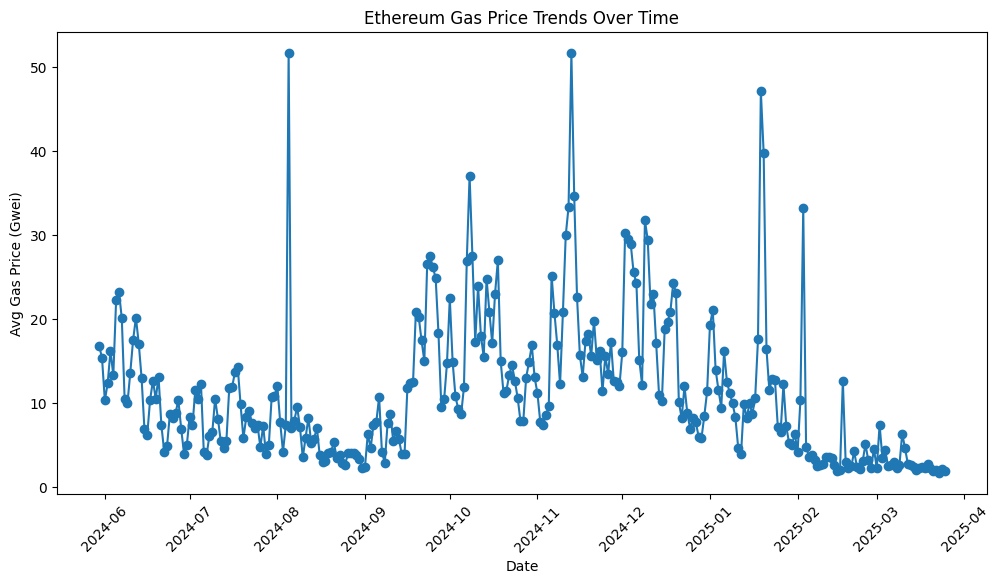

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['transaction_date'], df['avg_gas_price_gwei'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Avg Gas Price (Gwei)')
plt.title('Ethereum Gas Price Trends Over Time')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from google.cloud import bigquery
client = bigquery.Client()

query = """ SELECT DATE(block_timestamp) AS tx_date, COUNT(*) AS bridge_tx_count FROM bigquery-public-data.crypto_ethereum.transactions WHERE to_address IN ( '0xA0c68C638235ee32657e8f720a23ceC1bFc77C77',  '0x4200000000000000000000000000000000000010', '0x4f3Aff3A747fCADe12598081e80c6605A8be192F'  ) AND block_timestamp >= '2024-01-01' GROUP BY tx_date ORDER BY tx_date LIMIT 300;

 """

df = client.query(query).to_dataframe()
df.head()

,tx_date,bridge_tx_count
0,2024-01-02,1
1,2024-01-04,1
2,2024-01-21,1
3,2024-01-23,1
4,2024-01-24,1


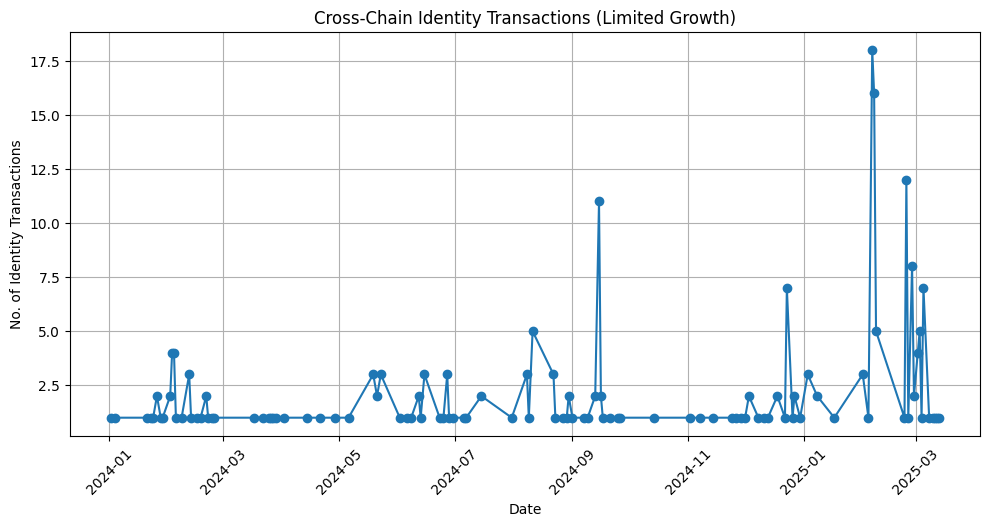

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['tx_date'], df['bridge_tx_count'], marker='o')
plt.title('Cross-Chain Identity Transactions (Limited Growth)')
plt.xlabel('Date')
plt.ylabel('No. of Identity Transactions')
plt.grid(True)
interop_path = "/mnt/data/interop_challenges.png"
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [13]:
from google.cloud import bigquery
client = bigquery.Client()

query = """ SELECT DATE(block_timestamp) AS dated, AVG(gas_price)/1e9 AS avg_gas_price_gwei FROM bigquery-public-data.crypto_ethereum.transactions WHERE to_address IS NOT NULL AND receipt_status = 1 AND DATE(block_timestamp) BETWEEN '2024-01-01' AND '2024-12-31' GROUP BY DATE(block_timestamp) ORDER BY DATE(block_timestamp) ASC;

 """

df = client.query(query).to_dataframe()
df.head()

,dated,avg_gas_price_gwei
0,2024-01-01,14.909836
1,2024-01-02,22.300259
2,2024-01-03,39.936536
3,2024-01-04,26.128107
4,2024-01-05,22.825259


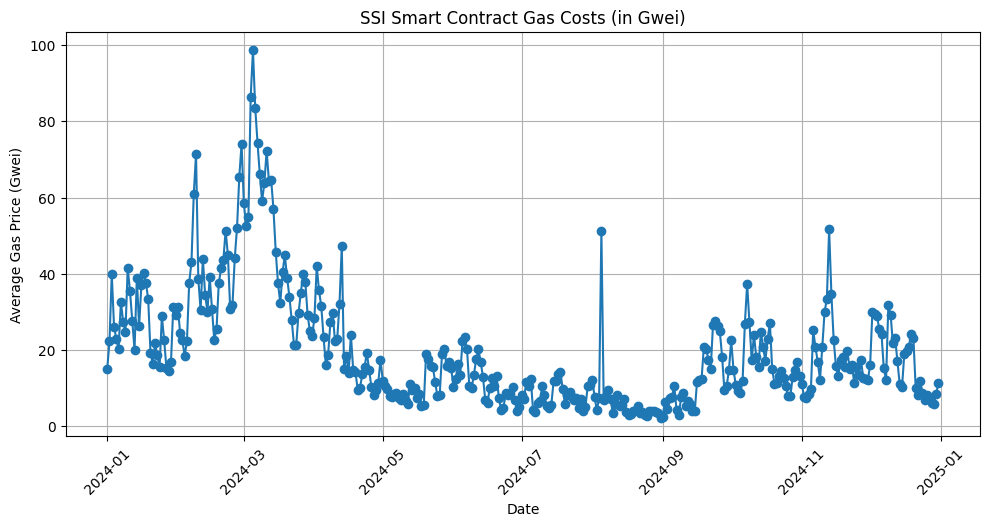

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['dated'], df['avg_gas_price_gwei'], marker='o')
plt.title('SSI Smart Contract Gas Costs (in Gwei)')
plt.xlabel('Date')
plt.ylabel('Average Gas Price (Gwei)')  # Correct label
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
from google.cloud import bigquery
client = bigquery.Client()

query = """ SELECT number, timestamp, LAG(timestamp) OVER (ORDER BY number) AS prev_timestamp, TIMESTAMP_DIFF(timestamp, LAG(timestamp) OVER (ORDER BY number), SECOND) AS confirmation_delay FROM bigquery-public-data.crypto_ethereum.blocks WHERE timestamp >= '2024-01-01' ORDER BY number LIMIT 100;

 """

df = client.query(query).to_dataframe()
df.head()

,number,timestamp,prev_timestamp,confirmation_delay
0,18908895,2024-01-01 00:00:11+00:00,NaT,<NA>
1,18908896,2024-01-01 00:00:23+00:00,2024-01-01 00:00:11+00:00,12
2,18908897,2024-01-01 00:00:35+00:00,2024-01-01 00:00:23+00:00,12
3,18908898,2024-01-01 00:00:47+00:00,2024-01-01 00:00:35+00:00,12
4,18908899,2024-01-01 00:00:59+00:00,2024-01-01 00:00:47+00:00,12


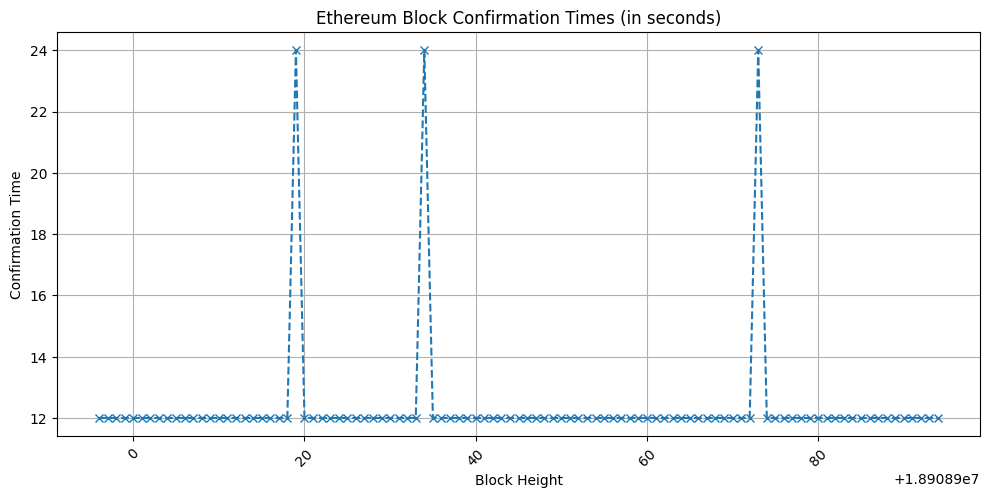

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['number'], df['confirmation_delay'], marker='x', linestyle='--')
plt.title('Ethereum Block Confirmation Times (in seconds)')
plt.xlabel('Block Height')
plt.ylabel('Confirmation Time')
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()